In [2]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,206.0,5.332719,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,130.0,4.875197,False
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,206.0,5.332719,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


## 데이터셋 나누기

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [6]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [7]:
y = df['Outcome']
y.shape

(768,)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [10]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## sklearn DecisionTreeClassifier

In [11]:
# DecisionTree 를 불러옵니다.
# DecisionTreeClassifier 와 DecisionTreeRegressor 중 분류이므로 Classifier 사용

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [12]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

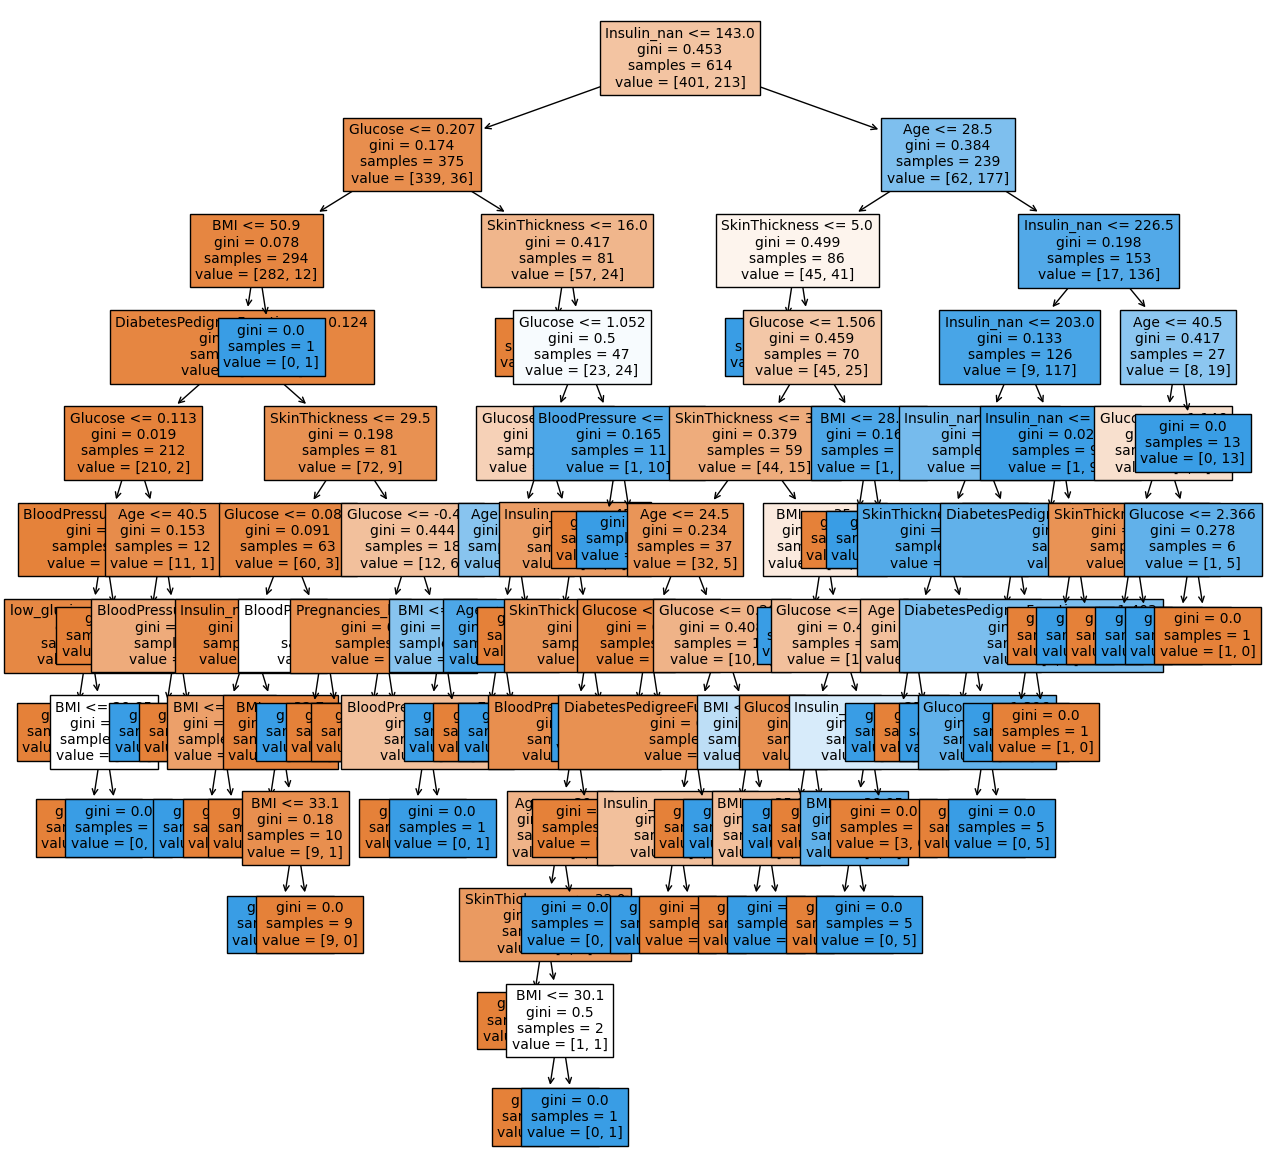

In [13]:
from sklearn.tree import plot_tree

#
feature_names = X_train.columns.tolist()

#
plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

83.11688311688312

## 파라메터 조정 Grid Search
- 지정해준 범위에서만 찾음

In [15]:
from sklearn.model_selection import GridSearchCV

# n_jobs=-1 > 내 장치에서 사용가능한 프로세서를 모두 사용
# cv > cross validation
# verbose > 0결과 미출력 1결과로그출력 

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [16]:
# 최적 파라메터
clf.best_params_

{'max_depth': 7, 'max_features': 0.7}

In [17]:
# 최적성능값
clf.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=0.7, random_state=42)

In [18]:
#
clf.best_score_

0.871398107423697

In [19]:
# cross validation 결과
clf.cv_results_

{'mean_fit_time': array([0.00440054, 0.00377927, 0.00299969, 0.00433249, 0.00359921,
        0.00560083, 0.00299969, 0.00380025, 0.00433798, 0.00305862,
        0.00220013, 0.00299988, 0.00319948, 0.00479927, 0.0027998 ,
        0.00299973, 0.00346513, 0.00313511, 0.00359993, 0.00299902,
        0.00299954, 0.00459962, 0.00380049, 0.00439959, 0.00339952,
        0.00279989, 0.00279908, 0.00400119, 0.00679398, 0.004528  ,
        0.00459986, 0.00372791, 0.00332794, 0.00440145, 0.0027276 ,
        0.00399957, 0.00460076, 0.00520034, 0.00460033, 0.00280027,
        0.00480003, 0.0033999 , 0.00459924, 0.00420127, 0.00259976]),
 'std_fit_time': array([4.89065292e-04, 9.53805612e-04, 2.33893365e-06, 1.87321501e-03,
        4.91381661e-04, 3.26073531e-03, 2.43140197e-07, 1.16693207e-03,
        8.64521067e-04, 6.39562509e-04, 4.00067257e-04, 8.34124359e-07,
        3.99995344e-04, 1.59983642e-03, 4.00209441e-04, 1.09527874e-03,
        7.77777527e-04, 4.50141137e-04, 4.90602280e-04, 1.0964115

In [20]:
# cross validation 결과를 dataframe으로 변환
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.003800,0.000748,0.001799,0.000748,7,0.7,"{'max_depth': 7, 'max_features': 0.7}",0.829268,0.886179,0.869919,0.861789,0.909836,0.871398,0.026704,1
17,0.003135,0.000450,0.001600,0.000490,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.853659,0.894309,0.821138,0.821138,0.885246,0.855098,0.030838,2
12,0.003199,0.000400,0.002200,0.000979,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.804878,0.910569,0.829268,0.861789,0.852459,0.851793,0.035393,3
1,0.003779,0.000954,0.002600,0.001200,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.861789,0.886179,0.788618,0.845528,0.868852,0.850193,0.033439,4
23,0.004400,0.001021,0.002201,0.001470,7,0.9,"{'max_depth': 7, 'max_features': 0.9}",0.829268,0.894309,0.837398,0.829268,0.860656,0.850180,0.024880,5


In [21]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [22]:
clf.score(X_test, y_test)

0.8311688311688312

# Random Search

In [23]:
max_depth = np.random.randint(3, 20, 10) # 3~20에서 10개
max_features = np.random.uniform(0.7, 1.0, 100)

param_distributions = {"max_depth" :max_depth, 
                       "max_features": max_features,
                       "min_samples_split" : list(range(2, 7))
                      }
param_distributions

{'max_depth': array([16, 12,  6,  9,  8, 18, 10, 17, 10, 11]),
 'max_features': array([0.86634325, 0.76619048, 0.91293887, 0.74712201, 0.769812  ,
        0.90726942, 0.99410323, 0.94153507, 0.87990257, 0.95416888,
        0.78312782, 0.70990638, 0.73352339, 0.748111  , 0.70788877,
        0.87552664, 0.82796853, 0.89717308, 0.89471235, 0.97941016,
        0.83583246, 0.9553144 , 0.91869137, 0.83997256, 0.8594647 ,
        0.98878637, 0.89381974, 0.82630288, 0.97023145, 0.83459245,
        0.85089231, 0.80598017, 0.89748135, 0.79665964, 0.70677486,
        0.84477389, 0.71330046, 0.82250238, 0.95996127, 0.7810325 ,
        0.86592523, 0.89869788, 0.82252212, 0.72030142, 0.97683715,
        0.82371959, 0.95618085, 0.73916571, 0.93481164, 0.84108115,
        0.7546334 , 0.92562456, 0.7171936 , 0.92699341, 0.79425259,
        0.88151883, 0.97566421, 0.99937731, 0.76051437, 0.98758035,
        0.78575862, 0.98103464, 0.76580529, 0.79287375, 0.98756246,
        0.9623715 , 0.90531822, 0.988

In [24]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([16, 12,  6,  9,  8, 18, 10, 17, 10, 11]),
                                        'max_features': array([0.86634325, 0.76619048, 0.91293887, 0.74712201, 0.769812  ,
       0.90726942, 0.99410323, 0.94153507, 0.87990257, 0.95416888,
       0.78312782, 0.70990638, 0.73352339, 0.748111  , 0.70788877,
       0....
       0.86419505, 0.76424108, 0.86378944, 0.81171377, 0.87251138,
       0.96343789, 0.7597218 , 0.75151326, 0.93780617, 0.98730322,
       0.73672617, 0.79515942, 0.97169072, 0.80910465, 0.87439025,
       0.83605185, 0.86077989, 0.80684028, 0.83739316, 0.74255908,
       0.96948664, 0.85846768, 0.73537703, 0.78831789, 0.96418409,
       0.97521995, 0.86334231, 0.95118504, 0.95411564, 0.86022324]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [25]:
clf.best_params_

{'min_samples_split': 3, 'max_features': 0.7171935968540148, 'max_depth': 6}

In [26]:
clf.best_score_

0.8648540583766493

In [27]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=0.7171935968540148,
                       min_samples_split=3, random_state=42)

In [28]:
clf.score(X_test, y_test)

0.8181818181818182

In [29]:
clf.cv_results_

{'mean_fit_time': array([0.00379887, 0.00439987, 0.00419989, 0.0035996 , 0.00399933,
        0.0041224 , 0.00523067, 0.00516849, 0.00519972, 0.00520144,
        0.00360169, 0.00380015, 0.00419946, 0.0039115 , 0.00440049,
        0.00379829, 0.00399909, 0.00380101, 0.00582747, 0.00505934,
        0.00420017, 0.00440044, 0.00480037, 0.00530143, 0.00475988,
        0.00377183, 0.00335908, 0.00479898, 0.00380096, 0.00415955,
        0.00355945, 0.00439992, 0.0061995 , 0.0044004 , 0.00779862,
        0.00439973, 0.0076005 , 0.00379901, 0.0042007 , 0.00420022,
        0.00679979, 0.00839958, 0.01099958, 0.00420079, 0.01380734,
        0.00559893, 0.00820007, 0.00360055, 0.00559916, 0.00439939,
        0.00952821, 0.00419974, 0.0041995 , 0.00819945, 0.00732856,
        0.00359988, 0.00432863, 0.00479965, 0.00400109, 0.00360098,
        0.00399942, 0.0038003 , 0.01099815, 0.00572801, 0.00979986,
        0.00662675, 0.00339923, 0.00452809, 0.00359945, 0.00400028,
        0.00370436, 0.00472727,

In [30]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
271,0.003798,0.000749,0.002107,0.000211,3,0.717194,6,"{'min_samples_split': 3, 'max_features': 0.717...",0.861789,0.894309,0.821138,0.861789,0.885246,0.864854,0.025351,1
721,0.003199,0.000748,0.001800,0.000400,3,0.709906,6,"{'min_samples_split': 3, 'max_features': 0.709...",0.861789,0.894309,0.821138,0.861789,0.885246,0.864854,0.025351,1
342,0.009799,0.009948,0.002001,0.000633,5,0.760514,6,"{'min_samples_split': 5, 'max_features': 0.760...",0.845528,0.861789,0.845528,0.869919,0.885246,0.861602,0.015132,3
400,0.005201,0.002993,0.001800,0.000400,6,0.707889,6,"{'min_samples_split': 6, 'max_features': 0.707...",0.845528,0.861789,0.845528,0.869919,0.885246,0.861602,0.015132,3
333,0.003199,0.000401,0.001400,0.000489,5,0.7133,6,"{'min_samples_split': 5, 'max_features': 0.713...",0.845528,0.861789,0.845528,0.869919,0.885246,0.861602,0.015132,3


In [31]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)